In [5]:
#!pip3 install seaborn

In [1]:
from IPython.core.display import HTML 
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 

In [2]:
train = pd.read_json('./input/train.json')


# function to format the dataset 
def format_dataset(df):
    df['image_id'] = df.annotations.map(lambda x: x['image_id'])
    df['label_id'] = df.annotations.map(lambda x: x['label_id'])
    df['url'] = df.images.map(lambda x: x['url'][0])
    df.drop(columns=['annotations', 'images'], inplace=True)

format_dataset(train)

# view the dataset snapshot
train.head(10)

,image_id,label_id,url
0,1,5,https://img13.360buyimg.com/imgzone/jfs/t2857/...
1,2,5,http://www.tengdakeli.cn/350/timg01/uploaded/i...
2,3,5,https://img13.360buyimg.com/imgzone/jfs/t8899/...
3,4,5,http://img4.tbcdn.cn/tfscom/i1/2855447419/TB2S...
4,5,5,http://a.vpimg4.com/upload/merchandise/287883/...
5,6,5,https://img.alicdn.com/imgextra/TB1HoBuHFXXXXX...
6,7,5,http://image.it168.com/n/640x480/6/6016/601653...
7,8,5,http://m.360buyimg.com/n12/jfs/t2161/78/174772...
8,9,5,http://dimg.cnlist.org/image/upload/68/3f/c1/9...
9,10,5,http://bpic.588ku.com/element_pic/17/11/10/75e...


/home/poonam/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


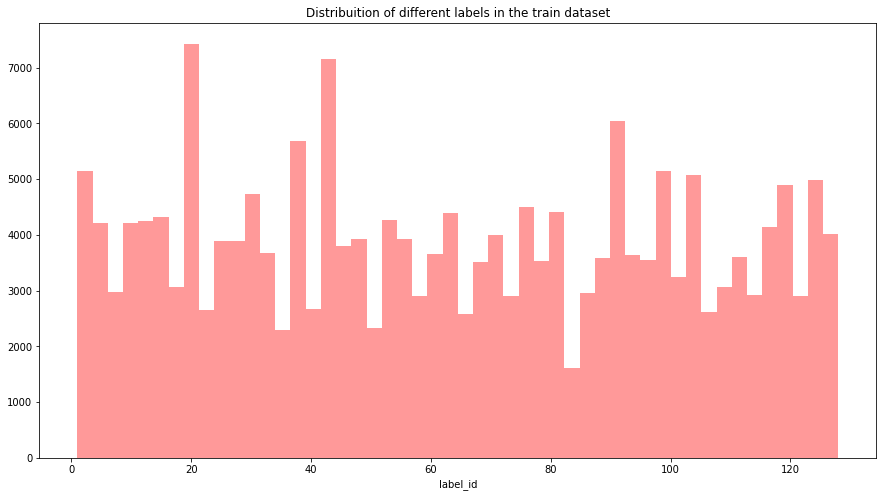

In [3]:
plt.figure(figsize = (15, 8))
plt.title('Distribuition of different labels in the train dataset')
sns.distplot(train['label_id'], color="red", kde=False);

In [4]:
label_df = train.label_id.value_counts().reset_index()

In [5]:
def display_urls(url_list, label, vals):
    img_style = "width: 180px; height:180px; margin: 0px; float: left; border: 1px solid #222;"
    images_list = ''.join([f"<img style='{img_style}' src='{u}' />" for _, u in url_list.iteritems()])
    html = "<h3>Images related to Label: " + str(label) + " (Total Images: " + str(vals) + ")</h3><br>" + images_list + "<br><br><br>"
    display(HTML(html))

val_list = list(label_df['label_id'])
for i, label in enumerate(label_df['index']):    
    url_list = train[train['label_id'] == int(label)].url.head(4)
    display_urls(url_list, label, val_list[i])
    if i == 10:
        break

In [6]:
## Let's say we want to do image search on Label no : 12( that is Table Lamp)

In [7]:
## Downloading dataset first for label 12

In [8]:
train_12=train[train['label_id']==12]
print(train_12.head())

       image_id  label_id                                                url
94692     94693        12  https://img11.360buyimg.com/imgzone/jfs/t5119/...
94693     94694        12  http://img2.nuandaoimg.com/Public/images/uploa...
94694     94695        12  https://img12.360buyimg.com/imgzone/jfs/t745/3...
94695     94696        12  https://img.alicdn.com/imgextra/TB2kcsib3fH8KJ...
94696     94697        12  https://www.ikea.cn/cn/zh/images/products/bo-j...


In [9]:
train_12['url'].values[0]

'https://img11.360buyimg.com/imgzone/jfs/t5119/73/1946159194/182429/9e2c2f9e/591674d9N548522ca.jpg'

In [12]:
import requests
import uuid
import os
from tqdm import tqdm

base_folder= './Data/12'
def download_image(image_url):
    fullpath=os.path.join(base_folder,str(uuid.uuid4())+'.jpg')
    if not os.path.exists(fullpath):
        try:
            with open(fullpath, 'wb') as f:
                f.write(requests.get(image_url,timeout=10).content)
        except:
            os.remove(fullpath)

In [13]:
for each_image_url in tqdm(train_12['url'].values):
    try:
        download_image(each_image_url)
    except:
        pass

100%|██████████| 2609/2609 [1:08:56<00:00,  1.59s/it]
